# SVM - Two Spiral Dataset

Now we will look at classifying the two-spiral dataset with a SVM.

![alt text](images/two_spiral.png "Two Spiral Dataset")


Instead of generating the dataset, we will read it from a file that takes the following form:

|    x   |    y   | class |
|:------:|:------:|:-----:|
|  -6.5  |   0.0  |   0   |
|  -6.5  |  -0.0  |   1   |
|  6.314 |  1.256 |   0   |
| -6.314 | -1.256 |   1   |
|   ...  |   ...  |  ...  |

In [60]:
import csv
import numpy as np
from sklearn.svm import SVC
from numpy import arange, round, meshgrid, resize
import matplotlib.pyplot as plt

def read_two_spiral_file(filename="datasets/spiralsdataset.csv"):
    x = []
    y = []
    
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            x.append(list(map(float, row[:-1])))
            y.append([int(v) for v in row[-1:]])

    return np.array(x), np.array(y)

x, y = read_two_spiral_file()

Build our classifier:

In [61]:
svm = SVC(C=1000, kernel='rbf', gamma='auto')
svm.fit(x, y[:, 0])

Fit to our data:

SVC(C=1000, gamma='auto')

In other examples it makes sense to test the trained model on the training dataset and display the predictions alongside the targets. For this dataset, it makes more sense to display our results visually. We are going to construct our own test set of coordinates, activate on each coordinate, and then display the activations.

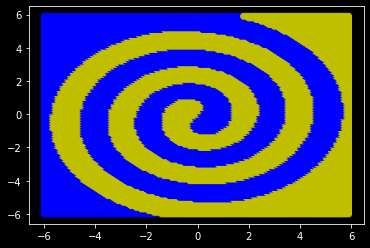

In [63]:
# Visualise activations
activation_range = arange(-6,6,0.1) # interval of [-6,6) with step size 0.1
coordinates = [(x,y) for x in activation_range for y in activation_range]
classifications = svm.predict(coordinates)
x, y = meshgrid(activation_range, activation_range)
plt.scatter(x, y, c=['b' if x > 0 else 'y' for x in classifications])
plt.show()

A good result is to have two, well separated, spirals. Play around with the SVM parameters to increase accuracy.